# newton, kind of

In [169]:
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.path as path
import numpy as np

In [170]:
%matplotlib inline

## create a random sample of particles

```
[x, y], [m], [vx, vy]
```

In [171]:
num_particles = 10
spread = 30
vel_spread = 5
p = np.zeros((num_particles, 2))
v = np.zeros((num_particles, 2))
m = np.zeros(num_particles)
m[0] = 5000 # the black hole!
v[0][0] = 0.1 # moving back hole!
for i in range(1, num_particles):
    p[i][0] = np.random.rand() * spread - spread / 2
    p[i][1] = np.random.rand() * spread - spread / 2
    v[i][0] = np.random.rand() * vel_spread - vel_spread / 2
    v[i][1] = np.random.rand() * vel_spread - vel_spread / 2
    m[i] = 1 + np.random.rand() * 10

## universal law-ish

In [172]:
G = .1 # we shall assume we have a strange universe :)
def newton(p1, m1, p2, m2):
    """ returns a directional force p1 -> p2 """
    dp = np.subtract(p2, p1)
    r = np.linalg.norm(dp)
    return (dp / r) * G * m1 * m2 / np.sum(r ** 2) 

## time and euler

In [173]:
def acc(p, v, m, dt):
    """ returns the accelerations between the particles """
    accs = np.zeros((num_particles, 2))
    for i in range(num_particles - 1):
        for j in range(i + 1, num_particles):
            F = newton(p[i], m[i], p[j], m[j]) * dt
            ai = F / m[i]
            aj = -F / m[j]
            accs[i] = np.add(accs[i], ai)
            accs[j] = np.add(accs[j], aj)
    return accs

In [174]:
follow_black_hole = True
num_time_steps = 500
time_step = 0.05
particle_paths = [[] for i in range(num_particles)]
for s in range(num_time_steps):
    accs = acc(p, v, m, time_step)
    for i in range(num_particles):
        particle_paths[i].append(np.subtract(p[i], p[0]).tolist() if follow_black_hole else p[i].tolist())
        v[i] = np.add(v[i], accs[i])
        p[i] = np.add(p[i], v[i])
maxx, maxy = 50, 50

## plot the orbits

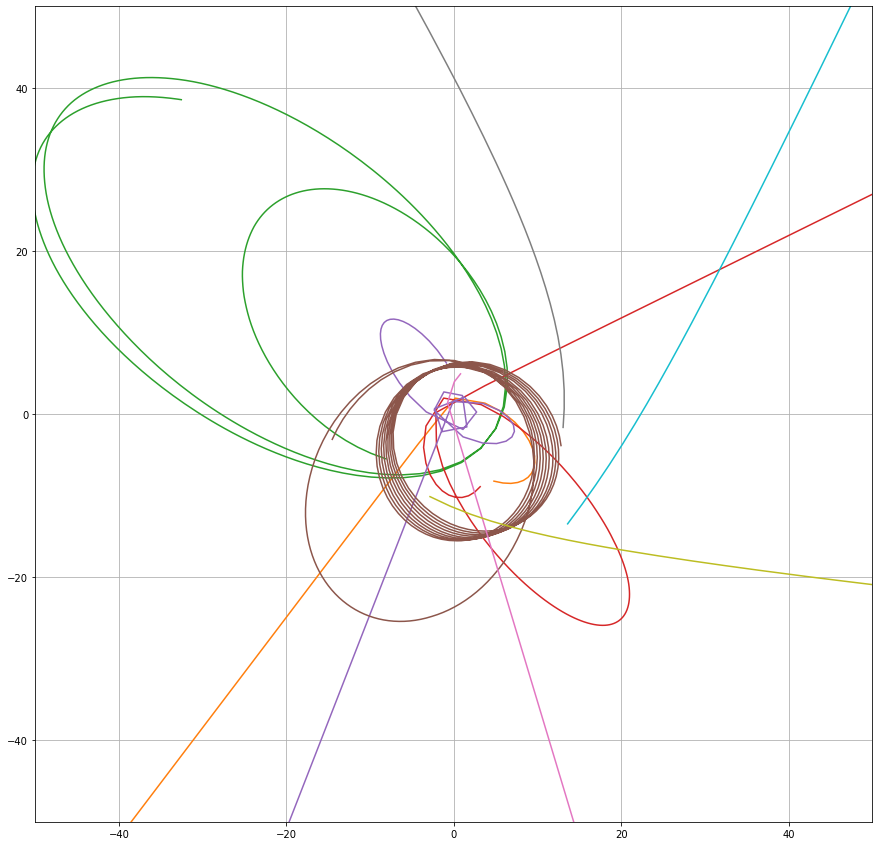

In [175]:

matplotlib.rc('figure', figsize=(15, 15))
for i in range(len(particle_paths)):
    x, y = np.array(particle_paths[i]).T
    plt.plot(x, y)
plt.xlim(-maxx, maxx)
plt.ylim(-maxy, maxy)
plt.grid()
plt.show()